In [ ]:
# terminal/zsh/cmd command
# pip
!pip install tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Download the IMDB dataset (or you can use any other sentiment dataset)
# For this example, we'll use the IMDB dataset from keras
from tensorflow.keras.datasets import imdb

# Load the dataset
print("Loading IMDB dataset...")
vocab_size = 1000  # Most frequent 10,000 words
max_length = 80    # Maximum length of sequences

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training data: {len(X_train)} samples")
print(f"Test data: {len(X_test)} samples")

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: 25000 samples
Test data: 25000 samples


In [ ]:
# Pad sequences to make them of equal length
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (25000, 80)
Test data shape: (25000, 80)


In [ ]:
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        Dropout(0.2),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build and display LSTM model
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_gru_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        Dropout(0.2),
        GRU(128, return_sequences=True),
        Dropout(0.2),
        GRU(64),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build and display GRU model
gru_model = build_gru_model()
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training parameters
epochs = 10
batch_size = 64
validation_split = 0.2

print("Training LSTM model...")
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1
)

print("\nTraining GRU model...")
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1
)

Training LSTM model...
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 207ms/step - accuracy: 0.6268 - loss: 0.6258 - val_accuracy: 0.7906 - val_loss: 0.4504
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.7973 - loss: 0.4469 - val_accuracy: 0.7856 - val_loss: 0.4652
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.7995 - loss: 0.4427 - val_accuracy: 0.7996 - val_loss: 0.4505
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.8383 - loss: 0.3743 - val_accuracy: 0.7958 - val_loss: 0.4496
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.8499 - loss: 0.3508 - val_accuracy: 0.7974 - val_loss: 0.4434
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8682 - loss: 0.3128 - val_accuracy: 0.7992 - val_loss: 0.4702
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.8788 - loss: 0.2924 - val_accuracy: 0.7896 - val_loss: 0.4942
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - acc

In [ ]:
# Evaluate LSTM model
print("LSTM Model Evaluation:")
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {lstm_loss:.4f}")
print(f"Test Accuracy: {lstm_accuracy:.4f}")

# Evaluate GRU model
print("\nGRU Model Evaluation:")
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {gru_loss:.4f}")
print(f"Test Accuracy: {gru_accuracy:.4f}")

# Make predictions
lstm_predictions = (lstm_model.predict(X_test) > 0.5).astype("int32")
gru_predictions = (gru_model.predict(X_test) > 0.5).astype("int32")

LSTM Model Evaluation:
Test Loss: 0.5592
Test Accuracy: 0.7796

GRU Model Evaluation:
Test Loss: 0.6888
Test Accuracy: 0.7681
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


In [ ]:
# Plot training history
def plot_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot for both models
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')

LSTM Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78     12500
    Positive       0.79      0.76      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000


GRU Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.82      0.78     12500
    Positive       0.80      0.72      0.76     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



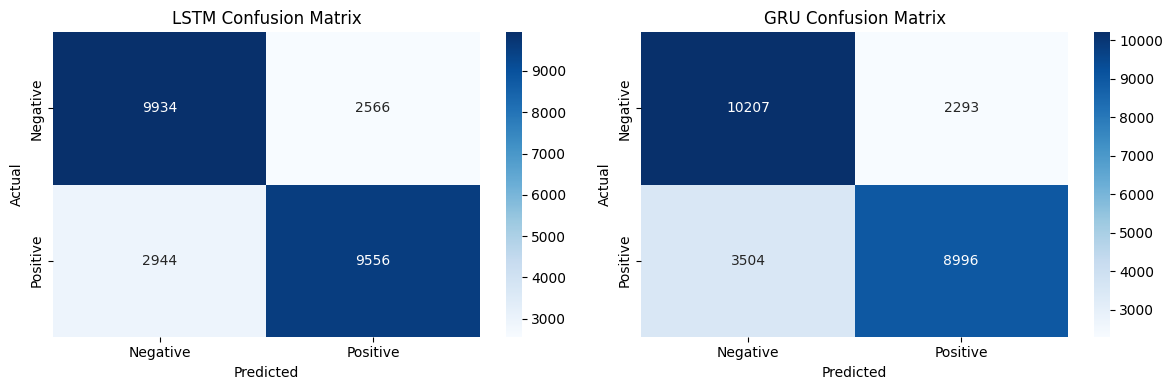

In [ ]:
# Classification reports
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predictions, target_names=['Negative', 'Positive']))

print("\nGRU Classification Report:")
print(classification_report(y_test, gru_predictions, target_names=['Negative', 'Positive']))

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# LSTM confusion matrix
cm_lstm = confusion_matrix(y_test, lstm_predictions)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax1.set_title('LSTM Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# GRU confusion matrix
cm_gru = confusion_matrix(y_test, gru_predictions)
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax2.set_title('GRU Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Get word index mapping
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def predict_sentiment(text, model, model_name):
    # Preprocess text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()

    # Convert words to indices
    sequence = []
    for word in words:
        if word in word_index and word_index[word] < vocab_size:
            sequence.append(word_index[word])
        else:
            sequence.append(2)  # OOV token

    # Pad sequence
    padded_sequence = pad_sequences([sequence], maxlen=max_length, padding='post', truncating='post')

    # Predict
    prediction = model.predict(padded_sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"{model_name} Prediction: {sentiment} (Confidence: {confidence:.4f})")
    return sentiment, confidence

# Test with custom text
test_texts = [
    "This movie was absolutely fantastic! Great acting and storyline.",
    "Terrible movie, waste of time. Poor acting and boring plot.",
    "It was okay, not great but not bad either."
]

for text in test_texts:
    print(f"\nText: {text}")
    print("-" * 50)
    lstm_sentiment, lstm_conf = predict_sentiment(text, lstm_model, "LSTM")
    gru_sentiment, gru_conf = predict_sentiment(text, gru_model, "GRU")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Text: This movie was absolutely fantastic! Great acting and storyline.
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
LSTM Prediction: Positive (Confidence: 0.5341)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
GRU Prediction: Positive (Confidence: 0.6826)

Text: Terrible movie, waste of time. Poor acting and boring plot.
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
LSTM Prediction: Positive (Confidence: 0.5398)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
GRU Prediction: Positive (Confidence: 0.5857)

Text: It was okay, not great but not bad either.
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
LSTM Prediction: Positive (Confidence: 0.5335)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
GRU Prediction: Positive (Confidence: 0.8036)


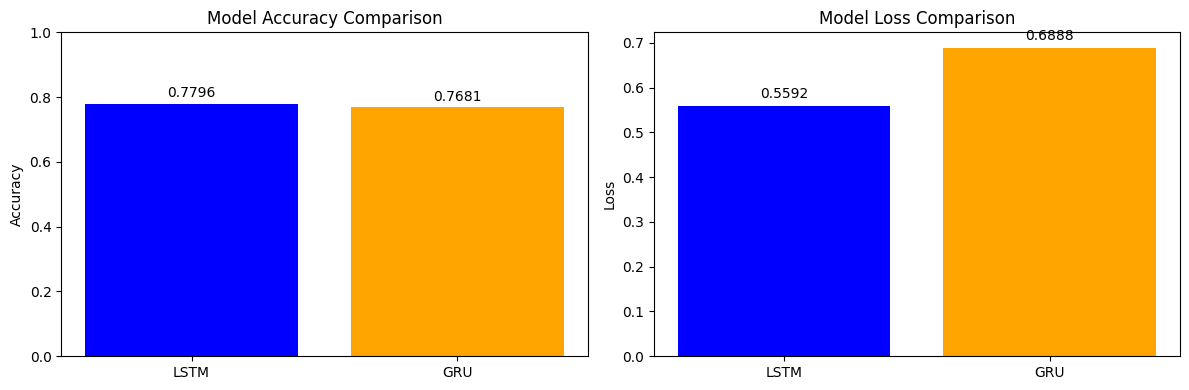

Final Comparison:
LSTM - Accuracy: 0.7796, Loss: 0.5592
GRU - Accuracy: 0.7681, Loss: 0.6888


In [ ]:
# Compare model performance
models = ['LSTM', 'GRU']
accuracies = [lstm_accuracy, gru_accuracy]
losses = [lstm_loss, gru_loss]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy comparison
bars1 = ax1.bar(models, accuracies, color=['blue', 'orange'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# Loss comparison
bars2 = ax2.bar(models, losses, color=['blue', 'orange'])
ax2.set_title('Model Loss Comparison')
ax2.set_ylabel('Loss')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Final Comparison:")
print(f"LSTM - Accuracy: {lstm_accuracy:.4f}, Loss: {lstm_loss:.4f}")
print(f"GRU - Accuracy: {gru_accuracy:.4f}, Loss: {gru_loss:.4f}")